# Exploratory Analysis

### importing libraries 

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn import *
from sklearn.preprocessing import StandardScaler
from scipy import stats


### loading dataset

In [2]:
df=pd.read_csv("marketplace.csv",index_col="date",parse_dates=True)
# loading the date column as index to the dataframe and parsing it as well
df.head()

,sku_name,product_id,merchant_code,merchant_badge,product_type,merchant_city,cod,price,stock,daily_gmv,daily_sold,daily_view,rating,total_review,total_sold
date,,,,,,,,,,,,,,,
2020-03-11,HUAWEI NOVA 5T RAM 8GB INTERNAL 128GB,E1,1.0,PM,Huawei nova 5T,Kota Kediri,False,4500000,1,0,0,0,95,37,74
2020-03-26,Huawei Nova 5T (8GB/128GB) - Crush Green,F1,2.0,OS,Huawei nova 5T,Kota Administrasi Jakarta Utara,False,4999000,5,0,0,0,0,0,2
2020-03-23,HUAWEI NOVA 5T RAM 8/128 GARANSI RESMI HUAWEI ...,F2,3.0,PM,Huawei nova 5T,Kota Administrasi Jakarta Barat,False,4589900,16,0,0,0,96,12,19
2020-04-29,HUAWEI NOVA 5T RAM 8/128GB GARANSI RESMI HUAWE...,E2,4.0,OS,Huawei nova 5T,Kota Surabaya,False,4698500,5,0,0,0,99,42,63
2020-04-15,nokia 3310 reborn,C1,5.0,RM,Nokia 1,Kab. Bangkalan,True,1000000,999999,0,0,3,100,18,82


### initial description

In [3]:
df.describe()

,merchant_code,price,stock,daily_gmv,daily_sold,daily_view,rating,total_review,total_sold
count,26007.000000,2.601400e+04,26014.000000,2.601400e+04,26014.000000,26014.000000,26014.000000,26014.000000,26014.000000
mean,1562.011112,3.890569e+06,344553.702083,1.582145e+06,0.737257,58.814331,98.339279,46.343969,152.429807
std,1041.170081,3.868790e+06,474104.795100,1.603716e+07,7.453432,473.091001,5.485507,91.149600,321.367828
min,1.000000,5.350000e+05,0.000000,-2.342700e+08,-82.000000,0.000000,0.000000,0.000000,0.000000
25%,854.000000,1.770000e+06,4.000000,0.000000e+00,0.000000,2.000000,98.000000,10.000000,27.000000
50%,1252.000000,2.599999e+06,37.000000,0.000000e+00,0.000000,5.000000,100.000000,24.000000,63.000000
75%,2287.000000,4.093925e+06,999972.000000,0.000000e+00,0.000000,21.000000,100.000000,44.000000,144.000000
max,4247.000000,5.000000e+07,999999.000000,9.415350e+08,441.000000,38993.000000,100.000000,2842.000000,7724.000000


In [4]:
df.isnull().sum()

sku_name          0
product_id        0
merchant_code     7
merchant_badge    0
product_type      0
merchant_city     0
cod               0
price             0
stock             0
daily_gmv         0
daily_sold        0
daily_view        0
rating            0
total_review      0
total_sold        0
dtype: int64

<AxesSubplot:ylabel='date'>

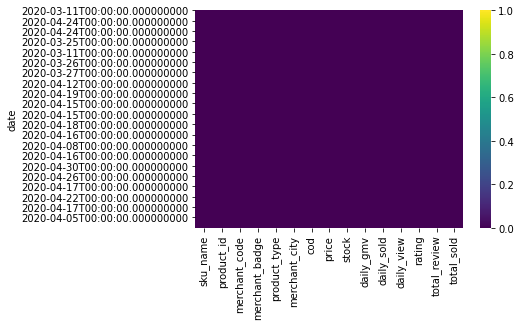

In [5]:
# plotting heat map to show null values
sns.heatmap(df.isnull(),cmap='viridis') ## highly clean dataset with only 7 null values in a single column

### No columns with dominating NULL values
> no column needs to be dropped as of now


### 7 tuples with NULL values in field "merchant_code"
> can be dropped

In [6]:
df=df.dropna() # dropping those tuples
df.isnull().sum()

sku_name          0
product_id        0
merchant_code     0
merchant_badge    0
product_type      0
merchant_city     0
cod               0
price             0
stock             0
daily_gmv         0
daily_sold        0
daily_view        0
rating            0
total_review      0
total_sold        0
dtype: int64

<AxesSubplot:ylabel='date'>

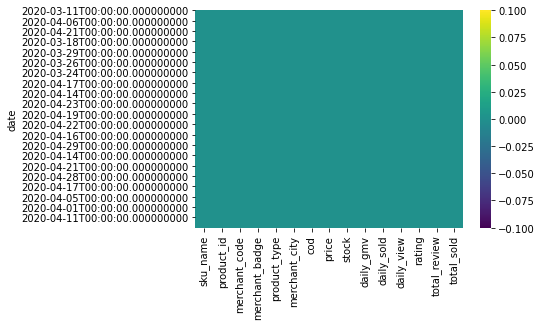

In [7]:
sns.heatmap(df.isnull(),cmap='viridis')

>boxplots for features

<AxesSubplot:ylabel='merchant_code'>

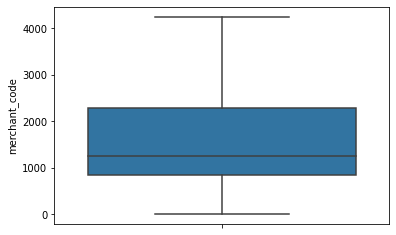

In [8]:

sns.boxplot(y='merchant_code',data=df)

<AxesSubplot:ylabel='price'>

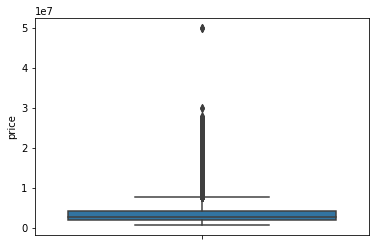

In [9]:
sns.boxplot(y='price',data=df)

<AxesSubplot:ylabel='stock'>

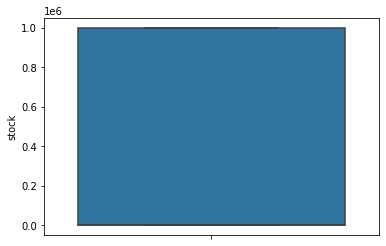

In [10]:
sns.boxplot(y='stock',data=df)

<AxesSubplot:ylabel='daily_gmv'>

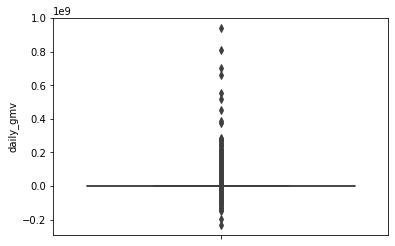

In [11]:
sns.boxplot(y='daily_gmv',data=df)

<AxesSubplot:ylabel='daily_sold'>

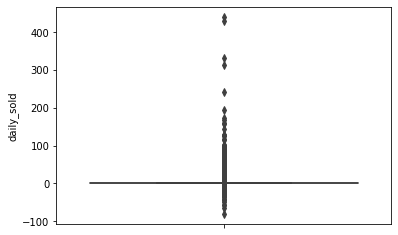

In [12]:
sns.boxplot(y='daily_sold',data=df)

<AxesSubplot:ylabel='daily_view'>

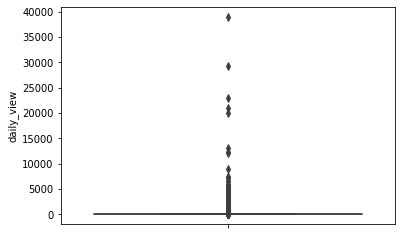

In [13]:
sns.boxplot(y='daily_view',data=df)

<AxesSubplot:ylabel='rating'>

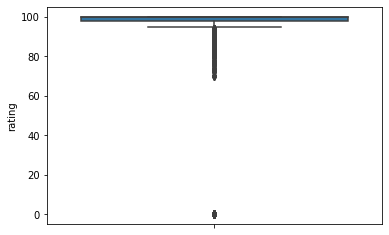

In [14]:
sns.boxplot(y='rating',data=df)

<AxesSubplot:ylabel='total_review'>

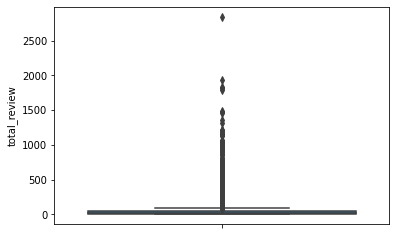

In [15]:
sns.boxplot(y='total_review',data=df)

>correlation matrix

<AxesSubplot:>

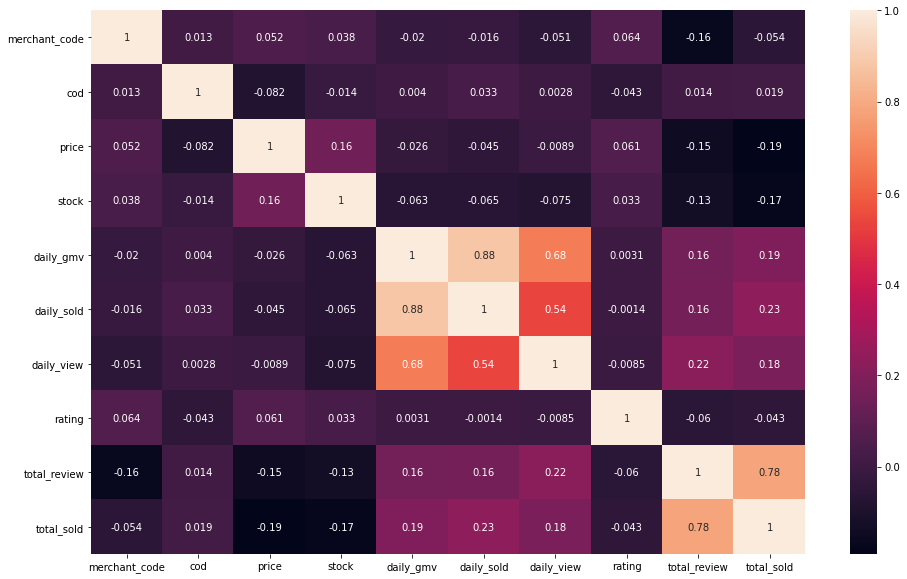

In [16]:
corrmatrix=df.corr()
plt.figure(figsize = (16,10))
sns.heatmap(corrmatrix, annot=True)

### plotting
>total_sold vs date

<AxesSubplot:xlabel='date'>

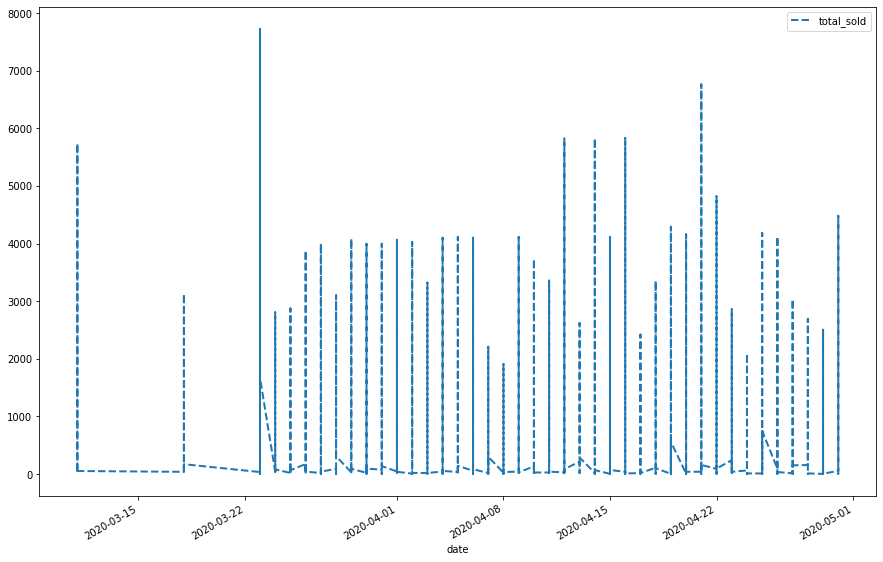

In [17]:
df[['total_sold']].plot(figsize=(15, 10),style=[ '--'],lw=2)

>plotting variables grouped by day of week

In [18]:
df_week = df[['daily_view','total_sold','total_review','rating']].groupby(df.index.weekday).sum() # they have similar range
df_week

,daily_view,total_sold,total_review,rating
date,,,,
0,239874,575517,167742,366134
1,193305,575324,171872,396506
2,334592,782640,236245,496246
3,254878,583539,181947,352151
4,163663,467891,147168,306335
5,153819,458902,146002,316334
6,189841,521126,154557,323900


<ipython-input-19-5ee74aac5580>:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(',Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday'.split(','))


(0.0, 814471.9)

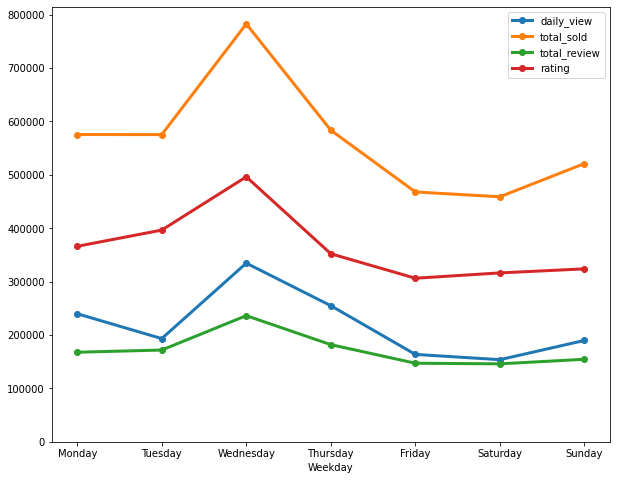

In [19]:
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
df_week.plot(style='-o', lw=3, ax=ax)
ax.set_xlabel('Weekday')
# We replace the labels 0, 1, 2... by the weekday
# names.
ax.set_xticklabels(',Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday'.split(','))
ax.set_ylim(0)  # Set the bottom axis to 0.

In [20]:
df_week = df[['stock','price','daily_gmv']].groupby(df.index.weekday).sum() # they have similar range
df_week

,stock,price,daily_gmv
date,,,
0,1209569462,13876702281,6896976128
1,1428182873,16611080428,4822291986
2,1783033796,20103019946,10863587351
3,1204889107,12868007873,4200600761
4,1050230945,12015689127,4470749054
5,1091570870,12723669029,4448481420
6,1193742519,12994420335,5455231562


<ipython-input-21-5ee74aac5580>:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(',Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday'.split(','))


(0.0, 21055659396.05)

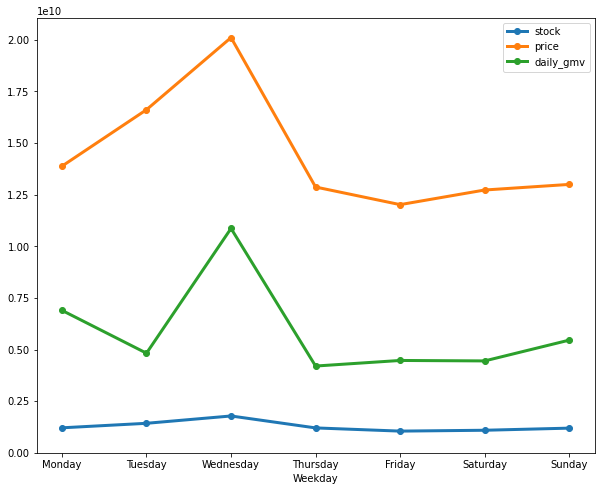

In [21]:
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
df_week.plot(style='-o', lw=3, ax=ax)
ax.set_xlabel('Weekday')
# We replace the labels 0, 1, 2... by the weekday
# names.
ax.set_xticklabels(',Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday'.split(','))
ax.set_ylim(0)  # Set the bottom axis to 0.

>total_sold w.r.t the categorical variable cod

>exploring how total_sold varies with the binary values of cod

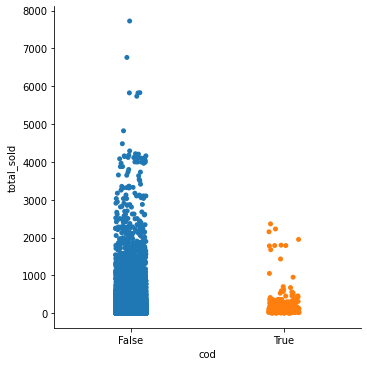

In [22]:
sns.catplot(x="cod", y="total_sold",data=df)

>exploring top 20 brands in terms of number of products

In [23]:
df['product_type'].value_counts()

Realme 6                          2161
Samsung Galaxy A10s               1062
Xiaomi Redmi Note 8               1025
Xiaomi Redmi 7A                    858
Xiaomi Redmi 6A                    747
                                  ... 
Xiaomi Mi 5c                         1
Huawei nova 7 5G                     1
vivo Y69                             1
Asus ZenFone Lite (L1) ZA551KL       1
Infinix Hot 9                        1
Name: product_type, Length: 361, dtype: int64

In [24]:
top_brands=df['product_type'].value_counts().head(20)

In [25]:
top_brands.to_frame(name="count")

,count
Realme 6,2161
Samsung Galaxy A10s,1062
Xiaomi Redmi Note 8,1025
Xiaomi Redmi 7A,858
Xiaomi Redmi 6A,747
Xiaomi Redmi Note 8 Pro,616
Apple iPhone 7 Plus,611
Apple iPhone 7,561
Xiaomi Redmi Note 7,523
Apple iPhone X,450


<AxesSubplot:>

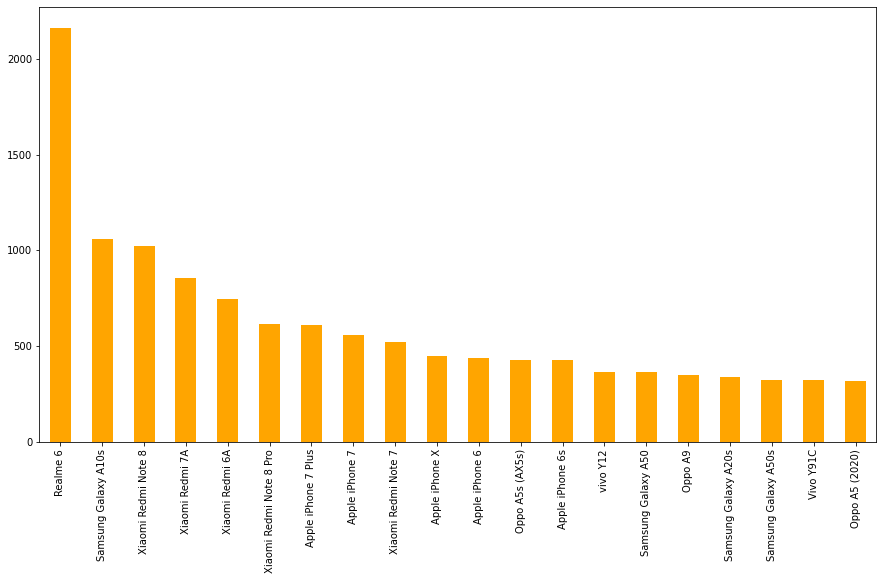

In [26]:
top_brands.plot.bar(color="orange",figsize=(15, 8))

>exploring top ten costliest w.r.t product type

In [27]:
bytype=df.groupby("product_type")
costliest=bytype.max("price")
costliest

,merchant_code,cod,price,stock,daily_gmv,daily_sold,daily_view,rating,total_review,total_sold
product_type,,,,,,,,,,
Apple iPhone,2756.0,False,21790000,999999,7000000,1,12,100,12,95
Apple iPhone 11,3198.0,False,18069000,999999,47850000,3,870,100,424,550
Apple iPhone 11 Pro,3670.0,False,24999000,999999,39000000,2,2118,100,256,355
Apple iPhone 11 Pro Max,4085.0,False,30000000,999999,222750000,9,6529,100,362,563
Apple iPhone 4,2796.0,True,3550000,999999,0,0,3,100,11,17
...,...,...,...,...,...,...,...,...,...,...
vivo Y93,2717.0,False,3000000,999999,9750000,6,833,100,647,974
vivo Y95,2720.0,False,4000000,999999,3000000,1,131,100,494,700
vivo Z1,2541.0,False,3000000,9982,0,0,23,92,5,29


In [28]:
costliest.nlargest(10,["price"])

,merchant_code,cod,price,stock,daily_gmv,daily_sold,daily_view,rating,total_review,total_sold
product_type,,,,,,,,,,
Apple iPhone 7 Plus,3767.0,True,50000000,999999,120275000,17,1184,100,218,607
Apple iPhone 11 Pro Max,4085.0,False,30000000,999999,222750000,9,6529,100,362,563
Samsung Galaxy Fold,1989.0,False,27885000,999978,0,0,86,100,18,24
Apple iPhone XS Max,3808.0,False,26500000,999999,14639000,1,480,100,129,306
Apple iPhone 11 Pro,3670.0,False,24999000,999999,39000000,2,2118,100,256,355
Apple iPhone X,3139.0,False,24598000,999999,12499000,1,544,100,120,233
Samsung Galaxy Fold 5G,2353.0,False,24500000,2,0,0,0,100,11,24
Apple iPhone XS,3327.0,False,23900000,999999,14645000,1,207,100,133,322
Apple iPhone,2756.0,False,21790000,999999,7000000,1,12,100,12,95


<AxesSubplot:xlabel='product_type'>

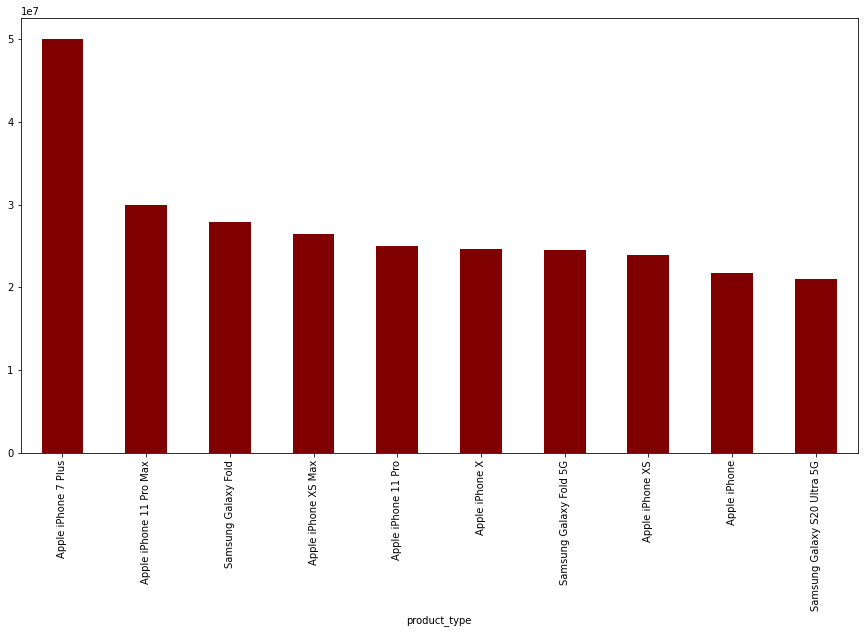

In [29]:
costliest=costliest.nlargest(10,["price"])["price"]
costliest.plot.bar(color="maroon",figsize=(15, 8))

In [30]:
df = df.sort_values(by='date')
df

,sku_name,product_id,merchant_code,merchant_badge,product_type,merchant_city,cod,price,stock,daily_gmv,daily_sold,daily_view,rating,total_review,total_sold
date,,,,,,,,,,,,,,,
2020-03-11,HUAWEI NOVA 5T RAM 8GB INTERNAL 128GB,E1,1.0,PM,Huawei nova 5T,Kota Kediri,False,4500000,1,0,0,0,95,37,74
2020-03-11,SAMSUNG A10S Ram 2-32 GB,E1319,2082.0,PM,Samsung Galaxy A10s,Kab. Bekasi,False,1616000,30,0,0,0,98,125,1546
2020-03-11,Vivo Z1 Pro 4/64 GB 64GB Garansi Resmi - Biru,E813,1295.0,PM,vivo Z1Pro,Kota Tangerang Selatan,False,2945000,2,0,0,0,99,24,51
2020-03-11,Samsung A10S 2/32 Garansi Resmi Baru Segel - H...,F1176,1845.0,PM,Samsung Galaxy A10s,Kab. Sleman,False,1615000,3,0,0,0,100,21,58
2020-03-11,VIVO Z1 PRO RAM 4/64 GB GARANSI RESMI VIVO IND...,E818,875.0,PM,vivo Z1Pro,Kota Administrasi Jakarta Barat,False,3279000,999999,0,0,0,98,137,194
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-04-30,VIVO Y12 RAM 3/64GB GARANSI RESMI VIVO INDONES...,E708,875.0,PM,vivo Y12,Kota Administrasi Jakarta Barat,False,1789000,9851,5367000,3,230,98,405,705
2020-04-30,REALME 6 PRO 8/128 6/128 4/64 - 8GB 6GB/128GB ...,G245,976.0,PM,Realme 6,Kota Administrasi Jakarta Pusat,False,4181000,8,33448000,8,435,97,29,51
2020-04-30,samsungA30,E1214,1910.0,PM,Samsung Galaxy A30,Kab. Tegal,False,3000000,96,0,0,3,100,50,231


# Processing functions and scaling of data

In [31]:
# importing all that is needed for training and testing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from matplotlib.pyplot import figure

### Normalising the continous variables

In [32]:
sc= StandardScaler()
df_new=df.copy()
column_names = ['price','stock','daily_gmv','daily_sold','daily_view','rating','total_review'] # List of columns that must be normalized
features = df_new[column_names]
scaler = sc.fit(features.values)
features = scaler.transform(features.values)
df_new[column_names] = features
unnorm_df=df # keeping track of data before normalisation , later used for chi2
df=df_new

In [33]:
# function that takes product name as parameter and returns a processed subset 
def get_dataset(name, mobile_dict,data):
    #A dictionary that will contain the unique mobile phone models as keys and their corresponding sales information in the
    #form of a dataframe as values
    if name in mobile_dict:
       # mobile_dict[name].set_index('week')
        return mobile_dict[name]

    #Getting the list of attributes needed to recreate the sales data dataframe for the individual phone models.
    column_list = []
    for i in data:
        column_list.append(i)
    

    #Creating the dataframes 
    for i in data['product_type'].unique():
        mobile_dict[i] = pd.DataFrame(columns=column_list)
  
    #Copying information into the dataframes
    for i in mobile_dict:
        mobile_dict[i] = data.loc[data['product_type'] == i]
    
    # Dropping date as it isn't unifomrly distributed and dropping product_type as it already happens to be 
    #the key in the dictionary

    for i in mobile_dict.keys():
        for column in mobile_dict[i].columns:
            if column in ['date', 'product_type']:
                del mobile_dict[i][column]

    #Appending the week column for each of the dataframes
#     for i in mobile_dict.keys():
#         week = []
#         for j in range(1, len(mobile_dict[i]) + 1):
#             week.append(str(j))
    
#         mobile_dict[i].insert(1, "week", week, True)
    
    # removing outliers
    column_names = ['price','stock','daily_gmv','daily_sold','daily_view','rating','total_review']
    for clm_name in mobile_dict[name].columns:
        if clm_name in column_names:
            q_low = mobile_dict[name][clm_name].quantile(0.01)
            q_hi  = mobile_dict[name][clm_name].quantile(0.99)

            df_filtered = mobile_dict[name][(mobile_dict[name][clm_name] < q_hi) & (mobile_dict[name][clm_name] > q_low)]

    # dropping all unnecessary columns
    
    df_filtered.drop(['sku_name','merchant_code','merchant_badge'],axis=1,inplace=True)
    # encoding categorical variables
    df_filtered=pd.get_dummies(data=df_filtered,columns=['cod','merchant_city','product_id'])
    mobile_dict[name]=df_filtered
    return df_filtered #mobile_dict[name]

In [34]:
mobile_dict={}
curr_data=get_dataset('Huawei nova 5T',mobile_dict,df)
curr_data

/home/sriram/.local/lib/python3.8/site-packages/pandas/core/frame.py:4162: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,price,stock,daily_gmv,daily_sold,daily_view,rating,total_review,total_sold,cod_False,merchant_city_Kab. Bekasi,...,product_id_F2,product_id_F3011,product_id_F3012,product_id_F3013,product_id_F674,product_id_F675,product_id_F676,product_id_F677,product_id_G335,product_id_G50
date,,,,,,,,,,,,,,,,,,,,,
2020-03-11,0.157408,-0.726784,-0.098670,-0.098930,-0.124337,-0.613162,-0.102615,74,1,0,...,0,0,0,0,0,0,0,0,0,0
2020-03-18,0.208712,-0.726773,-0.098670,-0.098930,-0.124337,-0.062909,-0.179405,48,1,0,...,0,0,0,0,0,0,0,0,0,0
2020-03-23,0.180643,-0.726752,-0.098670,-0.098930,-0.124337,-0.429745,-0.376864,19,1,0,...,1,0,0,0,0,0,0,0,0,0
2020-03-23,0.180643,-0.705727,-0.098670,-0.098930,-0.124337,0.120508,-0.179405,59,1,0,...,0,0,0,0,1,0,0,0,0,0
2020-03-24,0.177826,-0.726784,-0.098670,-0.098930,0.408270,-0.429745,-0.289104,38,1,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-04-29,0.208712,-0.726775,-0.098670,-0.098930,-0.124337,0.120508,-0.047765,63,1,0,...,0,0,0,0,0,0,0,0,0,0
2020-04-29,0.221764,-0.726746,-0.098670,-0.098930,-0.124337,-0.429745,-0.168435,58,1,0,...,0,0,0,0,0,0,0,1,0,0
2020-04-29,0.234946,-0.726758,-0.098670,-0.098930,-0.124337,-0.062909,1.400271,326,1,0,...,0,0,0,0,0,0,0,0,0,0


# BUILDONG THE MODELS

## Simple Linear Regression

>Since total_review is the highly correlated with total_Sold

In [35]:
X=curr_data['total_review'].values.astype(float)
Y=curr_data['total_sold'].values.astype(float)

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 1/3, random_state = 0)

In [37]:
X_train=X_train.reshape(-1,1)
y_train=y_train.reshape(-1,1)
X_test=X_test.reshape(-1,1)
y_test=y_test.reshape(-1,1)

In [38]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [39]:
y_pred = regressor.predict(X_test)

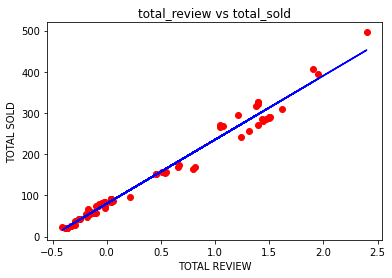

In [40]:
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('total_review vs total_sold')
plt.xlabel('TOTAL REVIEW')
plt.ylabel('TOTAL SOLD')
plt.show()

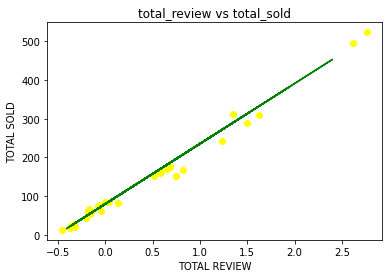

In [41]:
plt.scatter(X_test, y_test, color = 'yellow')
plt.plot(X_train, regressor.predict(X_train), color = 'green')
plt.title('total_review vs total_sold')
plt.xlabel('TOTAL REVIEW')
plt.ylabel('TOTAL SOLD')
plt.show()

In [42]:
r2_score(y_test, y_pred)

0.9824359693745011

In [43]:
mean_absolute_error(y_test, y_pred)

11.153096512578344

In [44]:
mean_squared_error(y_test, y_pred)

247.21676809535302

## Multiple Linear Regression

In [45]:
X=curr_data.copy()
X.drop(['total_sold'],axis=1,inplace=True)
Y=curr_data['total_sold'].values.astype(float)

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 3)

In [47]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [48]:
y_pred = regressor.predict(X_test)

In [49]:
r2_score(y_test, y_pred)

0.9973128301729254

In [50]:
mean_absolute_error(y_test, y_pred)

5.041849422759056

In [51]:
mean_squared_error(y_test, y_pred)

42.75822596954673

In [52]:
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[ 92.04  92.  ]
 [251.04 242.  ]
 [254.67 242.  ]
 [ 16.75  23.  ]
 [305.98 310.  ]
 [ 57.81  57.  ]
 [ 28.12  27.  ]
 [ 19.73  20.  ]
 [317.74 317.  ]
 [168.14 168.  ]
 [281.68 290.  ]
 [297.12 310.  ]
 [317.52 326.  ]
 [ 83.57  85.  ]
 [ 62.44  70.  ]
 [ 67.28  63.  ]
 [ 39.37  38.  ]
 [400.3  408.  ]
 [ 32.58  21.  ]
 [280.99 286.  ]
 [268.1  270.  ]
 [288.09 290.  ]
 [ 59.55  68.  ]]


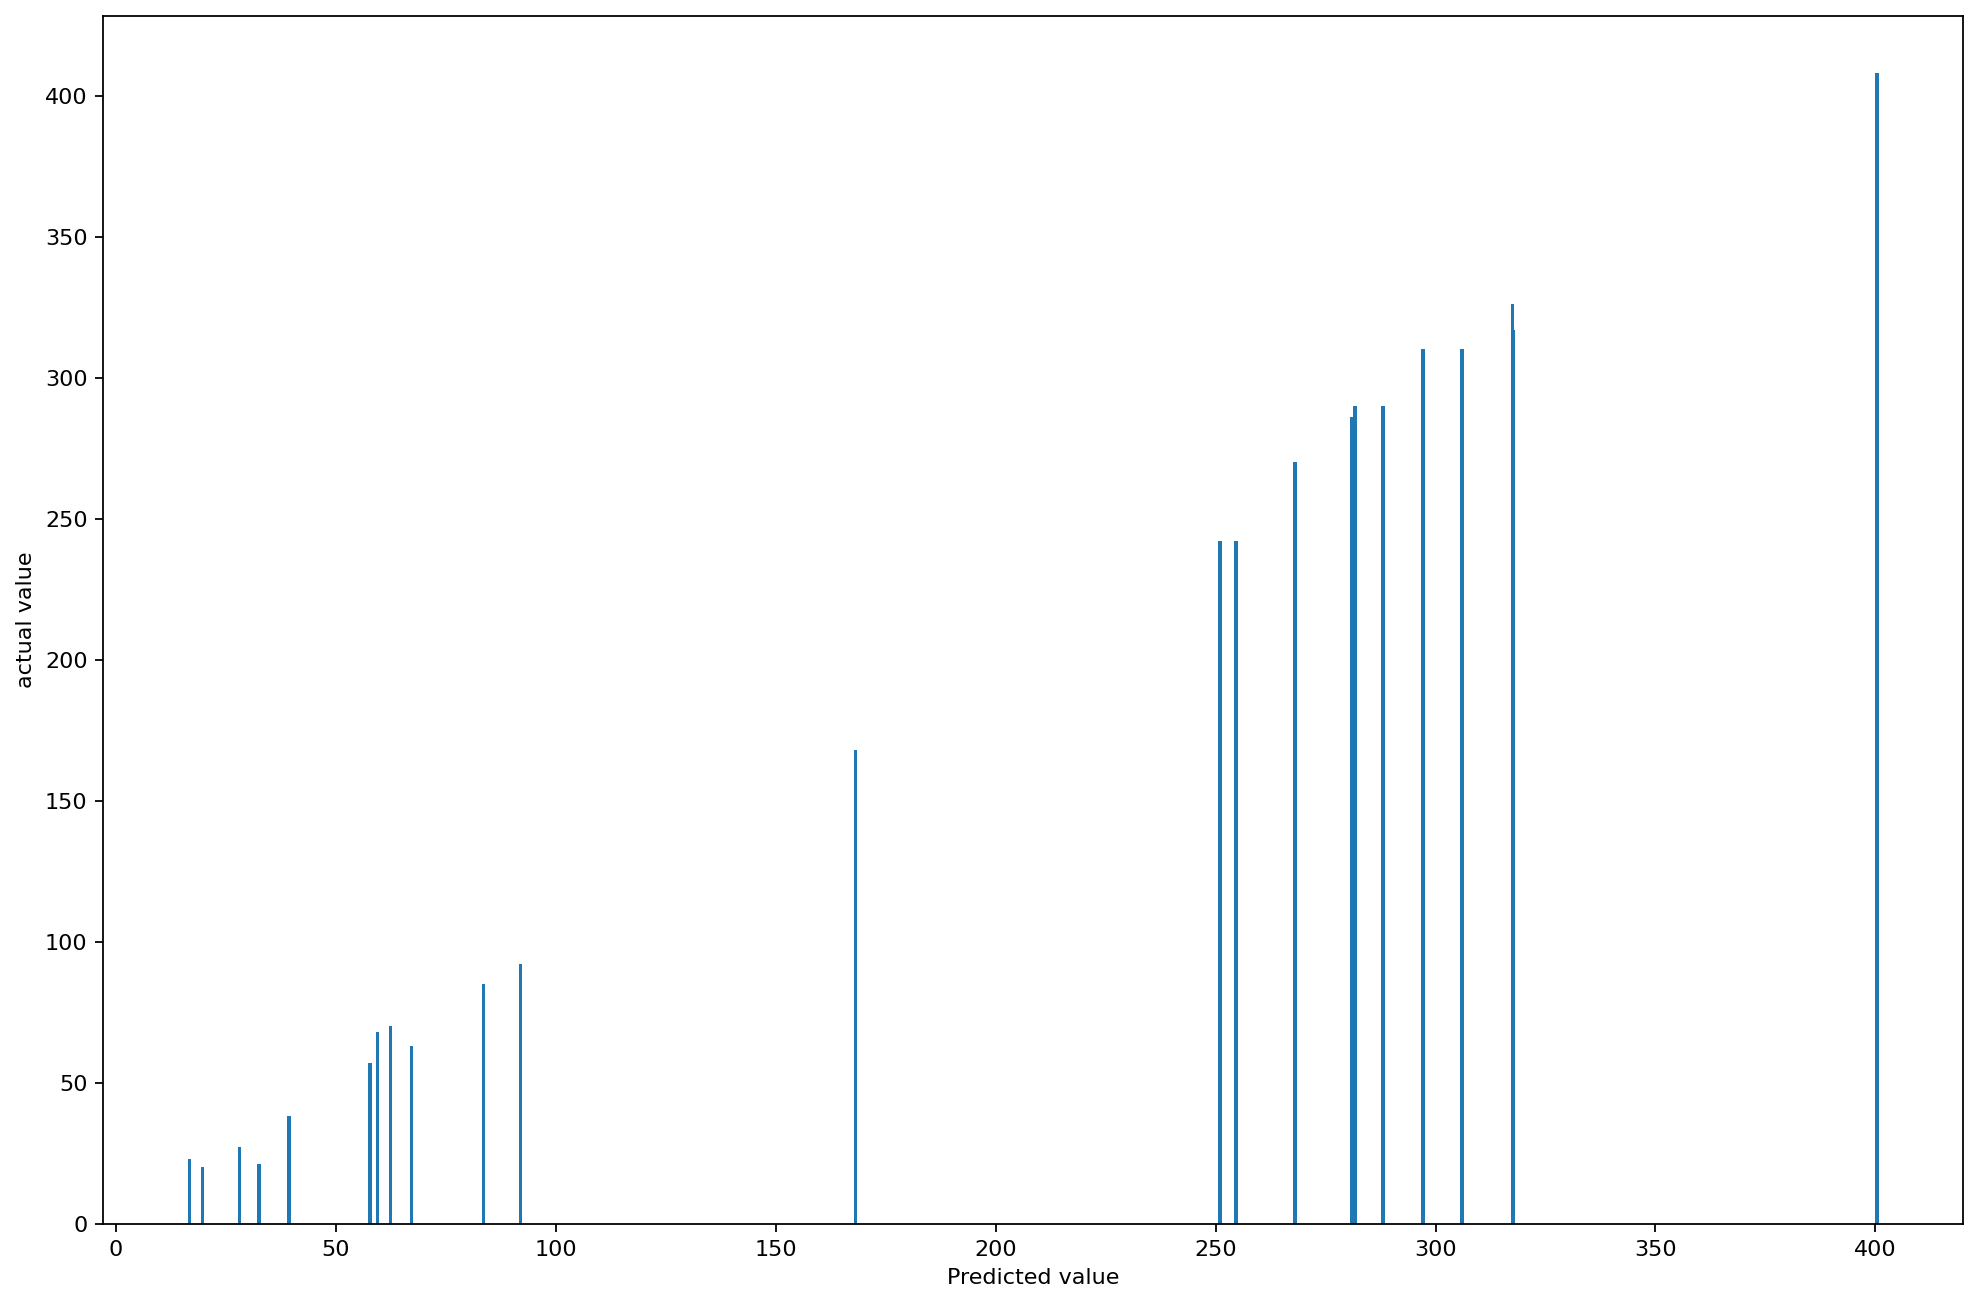

In [53]:
figure(num=None, figsize=(15, 10), dpi=160, facecolor='w', edgecolor='k')

plt.bar(y_pred,y_test)
plt.xlabel('Predicted value')
plt.ylabel('actual value')
plt.show()

# Random Forest

In [54]:
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)

In [55]:
regressor.fit(X_train, y_train)

RandomForestRegressor(n_estimators=10, random_state=0)

In [56]:
y_pred = regressor.predict(X_test)

In [57]:
r2_score(y_test, y_pred)

0.9744602196211687

In [58]:
mean_absolute_error(y_test, y_pred)

12.460869565217397

In [59]:
mean_squared_error(y_test, y_pred)

406.3887922705318

In [60]:
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[ 90.    92.  ]
 [284.   242.  ]
 [306.8  242.  ]
 [ 22.8   23.  ]
 [331.5  310.  ]
 [ 57.23  57.  ]
 [ 27.1   27.  ]
 [ 22.    20.  ]
 [313.7  317.  ]
 [165.9  168.  ]
 [285.7  290.  ]
 [283.4  310.  ]
 [291.   326.  ]
 [ 85.8   85.  ]
 [ 80.2   70.  ]
 [ 83.    63.  ]
 [ 32.    38.  ]
 [396.4  408.  ]
 [ 26.3   21.  ]
 [280.4  286.  ]
 [258.4  270.  ]
 [286.9  290.  ]
 [ 59.73  68.  ]]


>trying to bring out feature importances using the trained random forest regressor 

In [61]:
importances=regressor.feature_importances_

Feature ranking:
1. feature 6 : total_review (0.940355)
2. feature 27 : product_id_E919 (0.018277)
3. feature 10 : merchant_city_Kota Administrasi Jakarta Barat (0.011484)
4. feature 4 : daily_view (0.011397)
5. feature 0 : price (0.010611)
6. feature 3 : daily_sold (0.002352)
7. feature 2 : daily_gmv (0.001594)
8. feature 11 : merchant_city_Kota Administrasi Jakarta Pusat (0.001475)
9. feature 1 : stock (0.001284)
10. feature 5 : rating (0.000368)
11. feature 23 : product_id_E3261 (0.000286)
12. feature 8 : merchant_city_Kab. Bekasi (0.000136)
13. feature 18 : product_id_E2199 (0.000110)
14. feature 25 : product_id_E3263 (0.000076)
15. feature 35 : product_id_F674 (0.000052)
16. feature 33 : product_id_F3012 (0.000041)
17. feature 34 : product_id_F3013 (0.000028)
18. feature 13 : merchant_city_Kota Kediri (0.000023)
19. feature 32 : product_id_F3011 (0.000016)
20. feature 38 : product_id_F677 (0.000011)
21. feature 21 : product_id_E286 (0.000008)
22. feature 22 : product_id_E287 (0.00

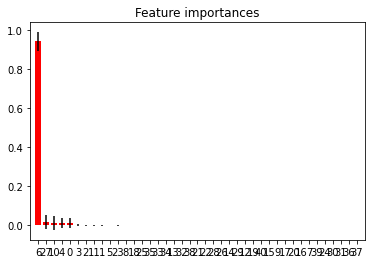

In [62]:
std = np.std([tree.feature_importances_ for tree in regressor.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X_train.shape[1]):
    print("%d. feature %d : %s (%f)" % (f + 1,indices[f], X_train.columns[indices[f]], importances[indices[f]]))

# Plot the impurity-based feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices],color="r", yerr=std[indices], align="center")
plt.xticks(range(X_train.shape[1]), indices)
plt.xlim([-1, X_train.shape[1]])
plt.show()

> total review seems to be determining the dependant variable to a great extent

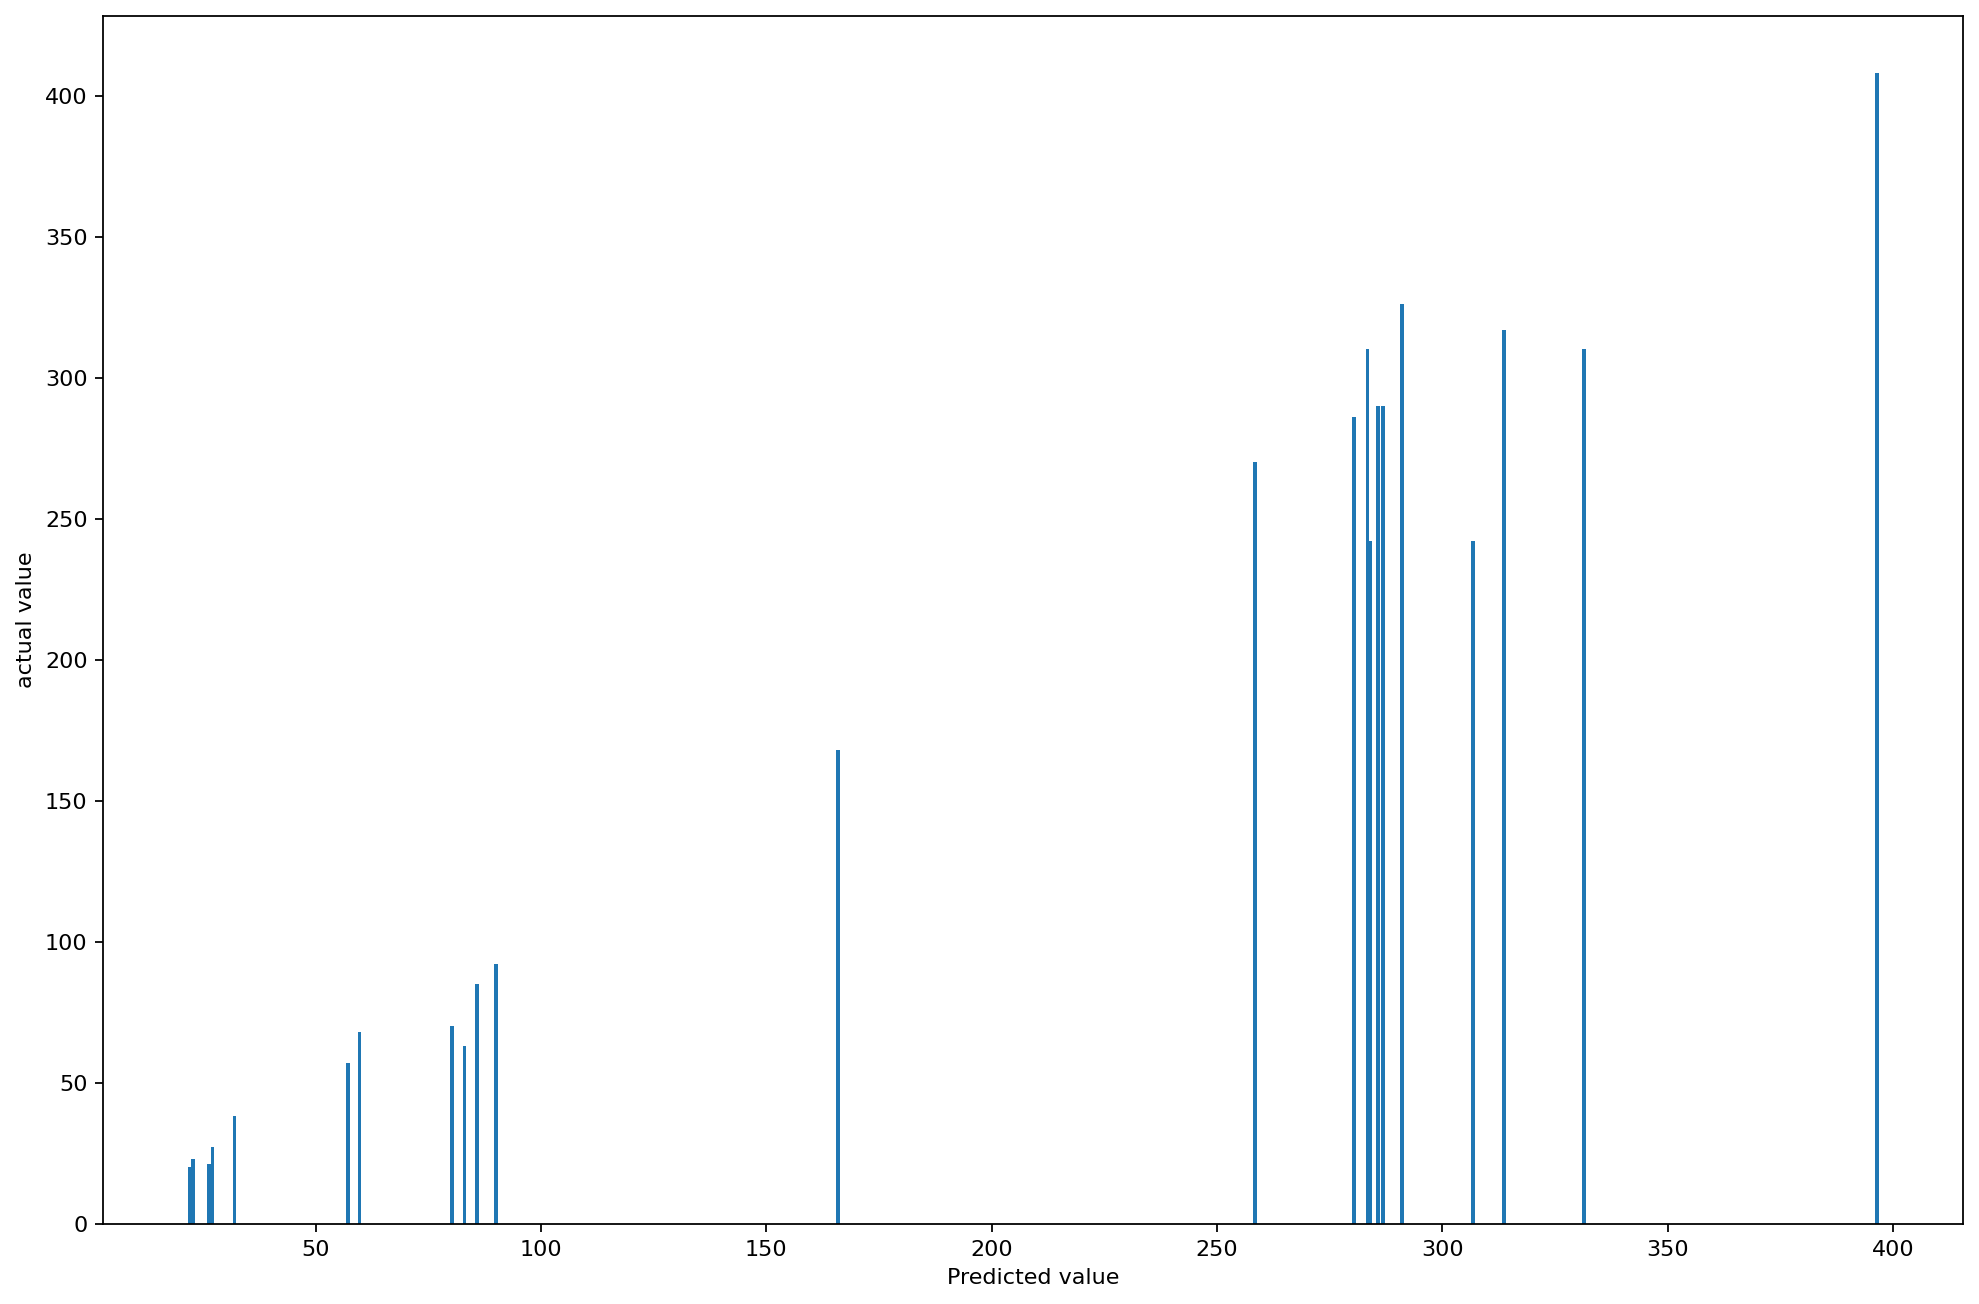

In [63]:
figure(num=None, figsize=(15, 10), dpi=160, facecolor='w', edgecolor='k')

plt.bar(y_pred,y_test)
plt.xlabel('Predicted value')
plt.ylabel('actual value')
plt.show()

> Training without considering total_review

In [64]:
X=curr_data.copy()
X.drop(['total_sold','total_review'],axis=1,inplace=True)
Y=curr_data['total_sold'].values.astype(float)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 3)

In [65]:
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
r2_score(y_test, y_pred)

0.8328716400674071

Feature ranking:
1. feature 4 : daily_view (0.317270)
2. feature 26 : product_id_E919 (0.270946)
3. feature 10 : merchant_city_Kota Administrasi Jakarta Pusat (0.151379)
4. feature 1 : stock (0.052359)
5. feature 35 : product_id_F675 (0.039197)
6. feature 8 : merchant_city_Kab. Karawang (0.035491)
7. feature 25 : product_id_E79 (0.023186)
8. feature 22 : product_id_E3261 (0.015739)
9. feature 27 : product_id_E920 (0.015647)
10. feature 24 : product_id_E3263 (0.015500)
11. feature 17 : product_id_E2199 (0.012264)
12. feature 2 : daily_gmv (0.007707)
13. feature 9 : merchant_city_Kota Administrasi Jakarta Barat (0.007515)
14. feature 30 : product_id_F2 (0.007232)
15. feature 5 : rating (0.006019)
16. feature 28 : product_id_F1941 (0.004133)
17. feature 3 : daily_sold (0.004115)
18. feature 34 : product_id_F674 (0.003965)
19. feature 7 : merchant_city_Kab. Bekasi (0.003345)
20. feature 0 : price (0.003184)
21. feature 39 : product_id_G50 (0.000801)
22. feature 11 : merchant_city_Kota Admi

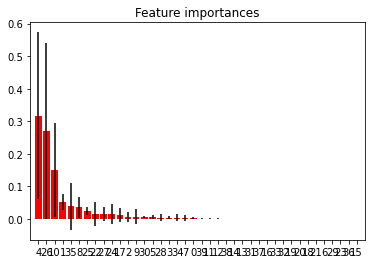

In [66]:
importances=regressor.feature_importances_
std = np.std([tree.feature_importances_ for tree in regressor.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X_train.shape[1]):
    print("%d. feature %d : %s (%f)" % (f + 1,indices[f], X_train.columns[indices[f]], importances[indices[f]]))

# Plot the impurity-based feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices],color="r", yerr=std[indices], align="center")
plt.xticks(range(X_train.shape[1]), indices)
plt.xlim([-1, X_train.shape[1]])
plt.show()

## ARIMA

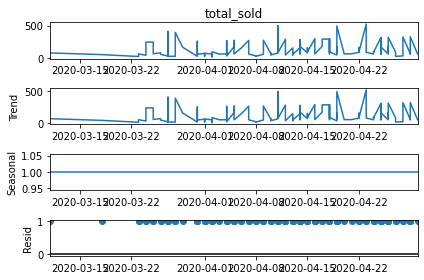

In [67]:
from statsmodels.tsa.seasonal import seasonal_decompose
from matplotlib import pyplot
curr_data=get_dataset('Huawei nova 5T',mobile_dict,df)

result = seasonal_decompose(curr_data['total_sold'], model ='multiplicative', period = 1)
result.plot()
pyplot.show()

In [68]:
from pmdarima import auto_arima 
  
# Ignore harmless warnings 
import warnings 
warnings.filterwarnings("ignore") 
  

stepwise_fit = auto_arima(curr_data['total_sold'], start_p = 1, start_q = 1, 
                          max_p = 5, max_q = 5, m = 12, 
                          start_P = 0, seasonal = True, 
                          d = None, D = 1, trace = True, 
                          error_action ='ignore',   # we don't want to know if an order does not work 
                          suppress_warnings = True,  # we don't want convergence warnings 
                          stepwise = True)           # set to stepwise 
  
# To print the summary 
stepwise_fit.summary() 

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=1.22 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=1355.156, Time=0.01 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=1327.656, Time=0.51 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=0.61 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=1353.348, Time=0.01 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=1356.964, Time=0.11 sec
 ARIMA(1,0,0)(2,1,0)[12] intercept   : AIC=1312.662, Time=1.92 sec
 ARIMA(1,0,0)(2,1,1)[12] intercept   : AIC=1302.959, Time=2.94 sec
 ARIMA(1,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=1.07 sec
 ARIMA(1,0,0)(2,1,2)[12] intercept   : AIC=inf, Time=4.78 sec
 ARIMA(1,0,0)(1,1,2)[12] intercept   : AIC=inf, Time=4.32 sec
 ARIMA(0,0,0)(2,1,1)[12] intercept   : AIC=1301.246, Time=2.06 sec
 ARIMA(0,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=0.73 sec
 ARIMA(0,0,0)(2,1,0)[12] intercept   : AIC=1310.691, Time=1.33 sec
 ARIMA(0,0,0)(2,1,2)[12] intercept   : AIC=inf, T

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 SARIMAX Results                                  
==================================================================================
Dep. Variable:                          y   No. Observations:                  115
Model:             SARIMAX(2, 1, [1], 12)   Log Likelihood                -645.623
Date:                    Mon, 30 Nov 2020   AIC                           1301.246
Time:                            12:20:41   BIC                           1314.420
Sample:                                 0   HQIC                          1306.582
                                    - 115                                         
Covariance Type:                      opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     14.1517      5.807      2.437      0.015       2.770      25.534
ar.S.L12      -0.2620      0.144     -1.821      0.069      -0.544       0.020
ar.S.L24      -0.1904      0.133     -1.430      0.153      -0.451       0.071
ma.S.L12      -0.7685      0.210     -3.653      0.000      -1.181      -0.356
sigma2      1.365e+04   2374.579      5.748      0.000    8995.356    1.83e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.31   Jarque-Bera (JB):                20.32
Prob(Q):                              0.58   Prob(JB):                         0.00
Heteroskedasticity (H):               1.24   Skew:                             0.97
Prob(H) (two-sided):                  0.53   Kurtosis:                         3.97
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [69]:
# Split data into train / test sets 
train = curr_data.iloc[:len(curr_data)-40] 
test = curr_data.iloc[len(curr_data)-40:] # set one year(12 months) for testing 
  
# Fit a SARIMAX(0, 1, 1)x(2, 1, 1, 12) on the training set 
from statsmodels.tsa.statespace.sarimax import SARIMAX 
  
model = SARIMAX(train['total_sold'],  
                order = (0, 0, 0),  
                seasonal_order =(2, 1, 1, 12)) 
  
result = model.fit() 
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 SARIMAX Results                                  
==================================================================================
Dep. Variable:                 total_sold   No. Observations:                   75
Model:             SARIMAX(2, 1, [1], 12)   Log Likelihood                -396.330
Date:                    Mon, 30 Nov 2020   AIC                            800.659
Time:                            12:20:42   BIC                            809.232
Sample:                                 0   HQIC                           804.031
                                     - 75                                         
Covariance Type:                      opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12      -0.1477      0.337     -0.438      0.661      -0.808       0.513
ar.S.L24      -0.2506      0.298     -0.841      0.401      -0.835       0.334
ma.S.L12      -0.7375      0.700     -1.053      0.292      -2.110       0.635
sigma2       1.33e+04   4705.861      2.826      0.005    4075.558    2.25e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                13.30
Prob(Q):                              0.96   Prob(JB):                         0.00
Heteroskedasticity (H):               0.46   Skew:                             0.95
Prob(H) (two-sided):                  0.08   Kurtosis:                         4.21
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<AxesSubplot:>

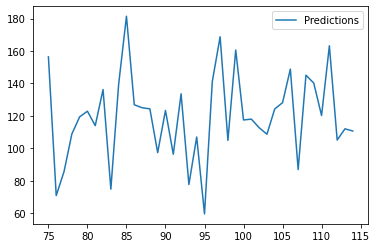

In [70]:
start = len(train) 
end = len(train) + len(test) - 1
  
# Predictions for one-year against the test set 
predictions = result.predict(start, end,typ = 'levels').rename("Predictions") 
  
# plot predictions and actual values 
predictions.plot(legend = True)

<AxesSubplot:xlabel='date'>

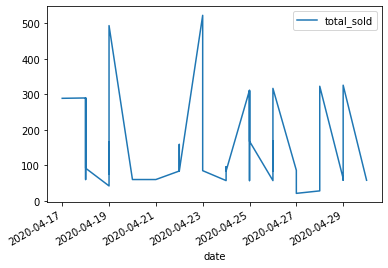

In [71]:
test['total_sold'].plot(legend = True)

In [72]:
# Load specific evaluation tools 
from sklearn.metrics import mean_squared_error 
from statsmodels.tools.eval_measures import rmse 
  
# Calculate root mean squared error 
print("rmse : ", rmse(test["total_sold"], predictions) )
  
# Calculate mean squared error 
print("mse : ", mean_squared_error(test["total_sold"], predictions))

rmse :  134.21321233080377
mse :  18013.186364153415


>checkpoint

## Feature importance 

In [73]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import  f_regression
bestfeat=SelectKBest(score_func= f_regression, k=10)
temp_x=curr_data.copy()
temp_x.drop(['total_sold'],axis=1,inplace=True)
temp_x=temp_x.to_numpy()
temp_y=curr_data['total_sold']
fit=bestfeat.fit(temp_x,temp_y)
scores=pd.DataFrame(fit.scores_)
col=pd.DataFrame(curr_data.columns)
featureScores = pd.concat([col,scores],axis=1)
featureScores.columns=["Specs","Score"]
print(featureScores.nlargest(5,'Score'))

                                            Specs        Score
6                                    total_review  6105.171218
27                                 product_id_E79    63.663729
11  merchant_city_Kota Administrasi Jakarta Barat    46.996206
4                                      daily_view    34.825704
23                                product_id_E287    23.212801


> As seen above and from the importance of features extracted from the random forest model, 
total review seems to be determining the dependant variable to a great extent
This obvious considering only those who buy products review them

## K-FOLD cross validation

In [74]:
from sklearn.model_selection import KFold

In [75]:
kfold = KFold(7, shuffle=True, random_state=1 )
regressor = LinearRegression()
from sklearn.metrics import accuracy_score

> with total_review column

In [76]:
X=curr_data.copy()
X.drop(['total_sold'],axis=1,inplace=True)
Y=curr_data['total_sold'].values.astype(float)
i=1
for train, test in kfold.split(X):
    X_train, X_test = X.iloc[train], X.iloc[test]
    y_train, y_test = Y[train], Y[test]
    model=regressor.fit(X_train, y_train)
    r2=r2_score(y_test, model.predict(X_test))
    print(f"split number: {i},r2 score: {r2}")
    i+=1

split number: 1,r2 score: 0.996253791535193
split number: 2,r2 score: 0.998512941108337
split number: 3,r2 score: 0.9981079910226315
split number: 4,r2 score: 0.9983402225325678
split number: 5,r2 score: 0.9973601446519462
split number: 6,r2 score: 0.9980076299092491
split number: 7,r2 score: 0.9969597044767351


>without total_review column

In [77]:
X=curr_data.copy()
X.drop(['total_sold','total_review'],axis=1,inplace=True)
Y=curr_data['total_sold'].values.astype(float)
i=1
for train, test in kfold.split(X):
    X_train, X_test = X.iloc[train], X.iloc[test]
    y_train, y_test = Y[train], Y[test]
    model=regressor.fit(X_train, y_train)
    r2=r2_score(y_test, model.predict(X_test))
    print(f"split number: {i},r2 score: {r2}")
    i+=1

split number: 1,r2 score: 0.9371398639647884
split number: 2,r2 score: 0.9422389238916714
split number: 3,r2 score: 0.9827197291246527
split number: 4,r2 score: 0.7391329153551158
split number: 5,r2 score: 0.9866863676864157
split number: 6,r2 score: 0.971517601469521
split number: 7,r2 score: 0.9318330354287021
